In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
y_train = np.genfromtxt('Train/Training Labels.txt')
y_test = np.genfromtxt('Test/Test Labels.txt')

In [3]:
def get_train_X(add_bias = False):
    X = np.zeros((2400, 784))
    for i in range (0, X.shape[0]):
        img = plt.imread("Train/"+str(i+1)+'.jpg')
        rows, cols = img.shape 
        img_size = rows*cols
        img_flat = img.reshape(img_size)
        X[i] = img_flat
    if add_bias:
        return np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    else:
        return X

In [4]:
def train(class_label, X, add_bias = False):
    y_train_c = np.copy(y_train)
    y_train_c = y_train_c == class_label
    m1 = np.mean(X[y_train_c == 0], axis = 0)
    m2 = np.mean(X[y_train_c == 1], axis = 0)
#     Sw = np.dot((X - m1).T, (X - m1)) + np.dot((X - m2).T, (X - m2))
#     w = np.dot(np.linalg.pinv(Sw), (m2 - m1).T)
    X_trans = np.transpose(X)
    X_X_transpose_inv = np.linalg.pinv(np.dot(X_trans, X))
    w = np.dot(np.dot((X_X_transpose_inv), X_trans), y_train_c)
#     if add_bias:
#         w[0] = -w.T.dot(m1 + m2)/2
    return w

In [5]:
def predict(image, W, add_bias = False):
    img = plt.imread(image)
    rows, cols = img.shape 
    img_size = rows*cols
    img_flat = img.reshape(img_size)[:, None]
    if add_bias:
        img_flat = np.concatenate([np.ones((1,1)), img_flat], axis=0)  
    return np.argmax(W.dot(img_flat))

In [6]:
def get_confusion_matrix(W_in, add_bias = False):
    confusion_matrix = np.zeros((10, 10))
    y_pred = np.zeros((200, 1))
    for i in range (0, 200):
        y_pred[i] = predict('Test/{}.jpg'.format(i+1), W_in, add_bias)
    for c_i in range (0, 10):
        imgs_i = c_i*20
        unique_elements, counts_elements = np.unique(y_pred[imgs_i:imgs_i+20], return_counts=True)
        for j in range(0, counts_elements.shape[0]):
            val = unique_elements[j]
            count = counts_elements[j]
            confusion_matrix[c_i][int(val)] = int(count)
    return confusion_matrix

In [7]:
X = get_train_X()

In [8]:
W = np.zeros((10, (784)))
for i in range (0, 10):
    W[i] = train(i, X)

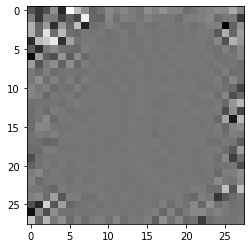

In [24]:
test_W = W[1].reshape((28, 28))
plt.imshow(test_W, cmap='gray')

this image was classified as: 9


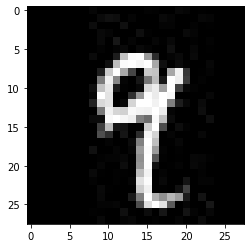

In [10]:
test_img = "Train/2399.jpg"
print("this image was classified as: {}".format(predict(test_img, W)))
plt.imshow(plt.imread(test_img), cmap='gray')
plt.show()

In [11]:
X_b = get_train_X(add_bias = True)
W_b = np.zeros((10, (785)))
for i in range (0, 10):
    W_b[i] = train(i, X_b, add_bias = True)

In [21]:
test_W = W_b[0:][2].reshape((28, 28))
plt.imshow(test_W, cmap='gray')

ValueError: cannot reshape array of size 785 into shape (28,28)

In [12]:
W_b_conf = get_confusion_matrix(W_b, add_bias = True)

In [13]:
W_conf = get_confusion_matrix(W)

In [14]:
W_conf

array([[19.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 12.,  2.,  2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 17.,  0.,  1.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 17.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0., 14.,  1.,  0.,  2.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0., 15.,  0.,  3.],
       [ 0.,  0.,  1.,  0.,  0.,  3.,  0.,  0., 15.,  1.],
       [ 1.,  0.,  0.,  1.,  1.,  1.,  0.,  4.,  0., 12.]])

In [15]:
np.sum(W_conf.diagonal())/200

0.805

In [16]:
W_b_conf

array([[19.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0., 20.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  3., 11.,  2.,  2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 17.,  0.,  1.,  0.,  0.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 17.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0., 14.,  1.,  0.,  2.,  2.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 20.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0., 15.,  0.,  3.],
       [ 0.,  0.,  1.,  0.,  0.,  3.,  0.,  0., 15.,  1.],
       [ 1.,  0.,  0.,  1.,  1.,  1.,  0.,  4.,  0., 12.]])

In [17]:
np.sum(W_b_conf.diagonal())/200

0.8

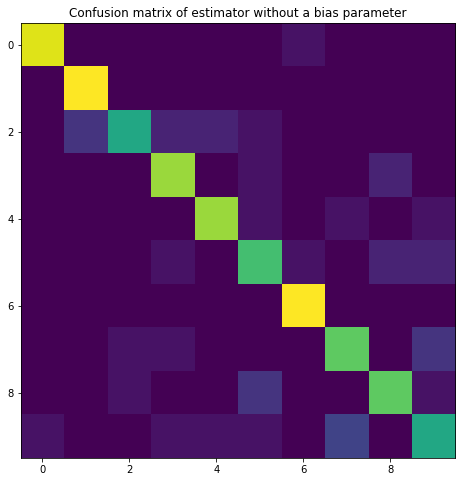

In [18]:
plt.figure(figsize=(10, 8))
plt.imshow(W_conf)
plt.savefig("Confusion_NoBias.jpg")
plt.title('Confusion matrix of estimator without a bias parameter')
plt.show()

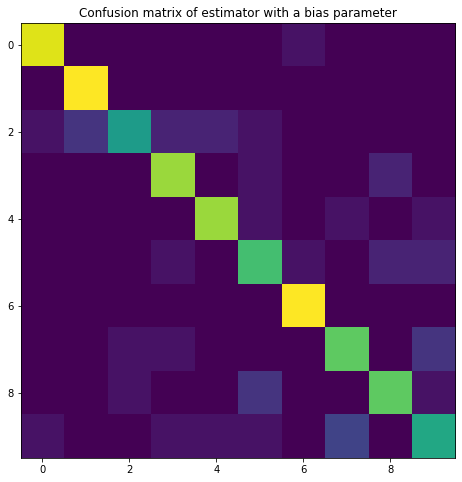

In [19]:
plt.figure(figsize=(10, 8))
plt.imshow(W_b_conf)
plt.savefig("Confusion_WithBias.jpg")
plt.title('Confusion matrix of estimator with a bias parameter')
plt.show()